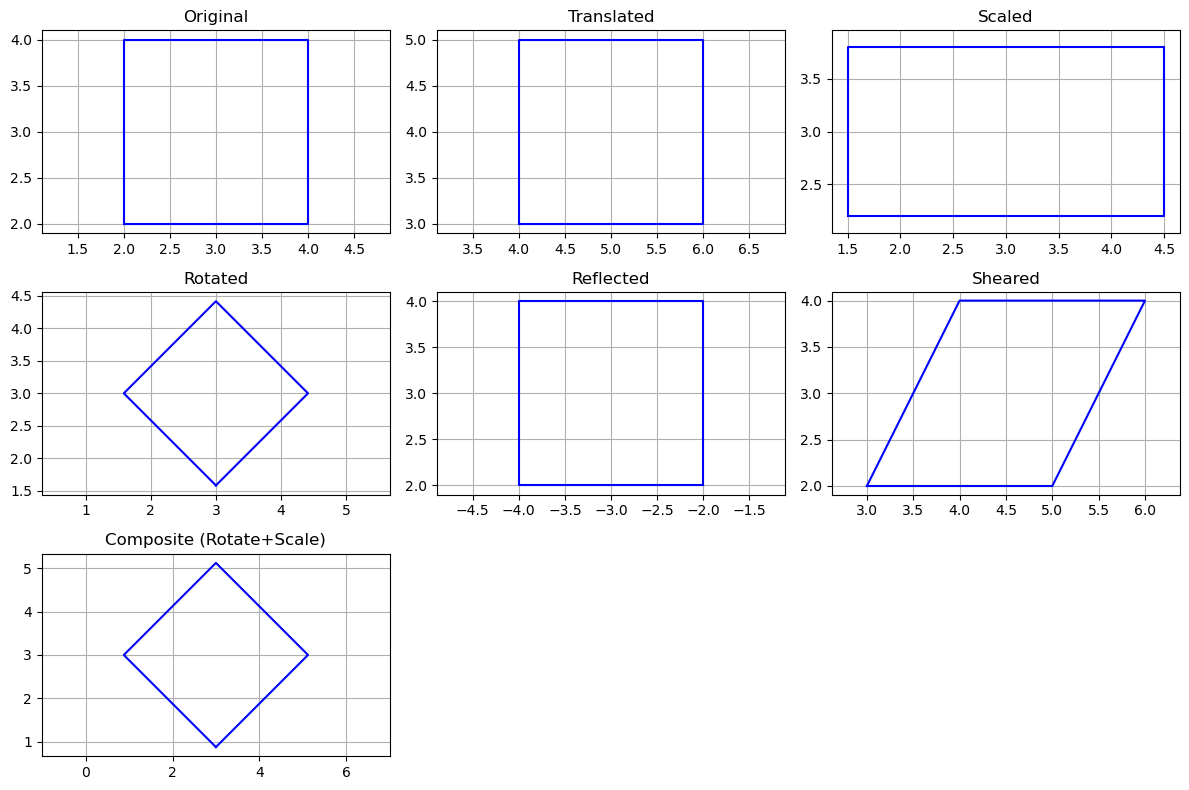

In [9]:
 import numpy as np
import matplotlib.pyplot as plt

# Original rectangle coordinates (x, y)
original = np.array([
    [2, 2],
    [2, 4],
    [4, 4],
    [4, 2],
    [2, 2]  # Closing point
])

# Transformation matrix generators
def get_translation_matrix(tx, ty):
    return np.array([[1, 0, tx],
                     [0, 1, ty],
                     [0, 0, 1]])

def get_scaling_matrix(sx, sy, cx=0, cy=0):
    return np.array([[1, 0, cx],
                     [0, 1, cy],
                     [0, 0, 1]]) @ \
           np.array([[sx, 0, 0],
                     [0, sy, 0],
                     [0, 0, 1]]) @ \
           np.array([[1, 0, -cx],
                     [0, 1, -cy],
                     [0, 0, 1]])

def get_rotation_matrix(theta, cx=0, cy=0):
    theta = np.radians(theta)
    return np.array([[1, 0, cx],
                     [0, 1, cy],
                     [0, 0, 1]]) @ \
           np.array([[np.cos(theta), -np.sin(theta), 0],
                     [np.sin(theta), np.cos(theta), 0],
                     [0, 0, 1]]) @ \
           np.array([[1, 0, -cx],
                     [0, 1, -cy],
                     [0, 0, 1]])

def get_reflection_matrix(axis='x'):
    if axis == 'x':
        return np.array([[1, 0, 0],
                         [0, -1, 0],
                         [0, 0, 1]])
    return np.array([[-1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]])

def get_shearing_matrix(shx=0, shy=0):
    return np.array([[1, shx, 0],
                     [shy, 1, 0],
                     [0, 0, 1]])

def apply_transformation(points, matrix):
    homo_points = np.hstack((points, np.ones((len(points), 1))))
    transformed = (homo_points @ matrix.T)[:, :2]
    return transformed

# Calculate centroid
centroid = np.mean(original[:-1], axis=0)

# Apply individual transformations
translated = apply_transformation(original, get_translation_matrix(2, 1))
scaled = apply_transformation(original, get_scaling_matrix(1.5, 0.8, *centroid))
rotated = apply_transformation(original, get_rotation_matrix(45, *centroid))
reflected = apply_transformation(original, get_reflection_matrix('y'))
sheared = apply_transformation(original, get_shearing_matrix(0.5, 0))

# Composite transformation: Rotate 45° then scale 1.5x
composite_matrix = (
    get_rotation_matrix(45, *centroid) @ 
    get_scaling_matrix(1.5, 1.5, *centroid)
)
composite = apply_transformation(original, composite_matrix)

# Plotting
plt.figure(figsize=(12, 8))
transformations = [
    (original, 'Original'),
    (translated, 'Translated'),
    (scaled, 'Scaled'),
    (rotated, 'Rotated'),
    (reflected, 'Reflected'),
    (sheared, 'Sheared'),
    (composite, 'Composite (Rotate+Scale)')
]

for i, (data, title) in enumerate(transformations, 1):
    plt.subplot(3, 3, i)
    plt.plot(data[:, 0], data[:, 1], 'b-')
    plt.title(title)
    plt.axis('equal')
    plt.grid(True)

plt.tight_layout()
plt.show()

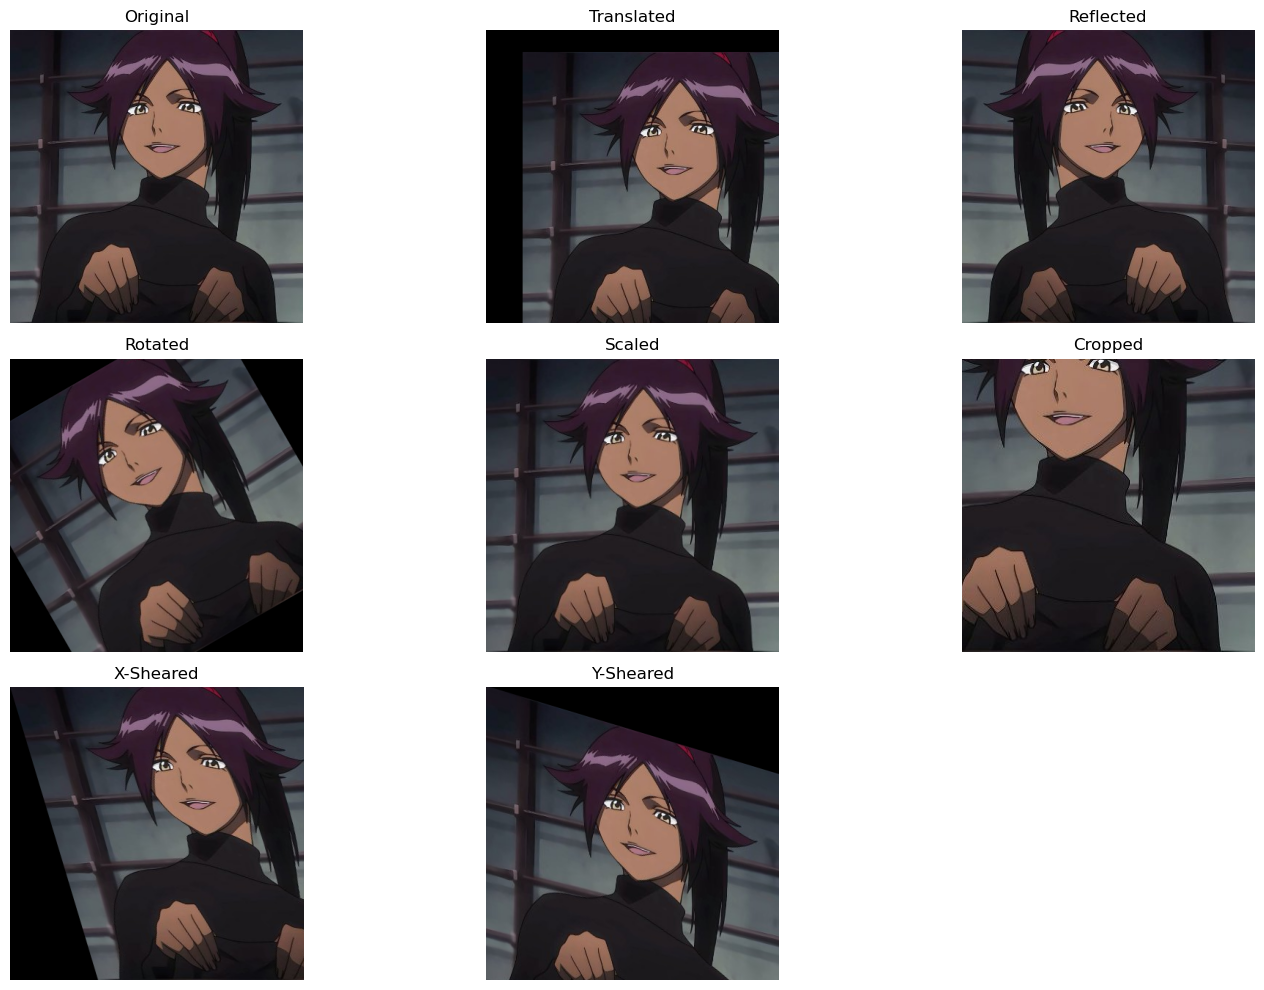

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('yoru.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image transformations
def image_translation(img, tx, ty):
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def image_reflection(img):
    return cv2.flip(img, 1)  # 1 for horizontal, 0 for vertical

def image_rotation(img, angle):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
    return cv2.warpAffine(img, M, (w, h))

def image_scaling(img, scale):
    return cv2.resize(img, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

def image_cropping(img, x1, y1, x2, y2):
    return img[y1:y2, x1:x2]

def image_shear_x(img, shear_factor):
    M = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def image_shear_y(img, shear_factor):
    M = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# Apply transformations
translated_img = image_translation(image, 50, 30)
reflected_img = image_reflection(image)
rotated_img = image_rotation(image, 30)
scaled_img = image_scaling(image, 0.8)
cropped_img = image_cropping(image, 100, 100, 400, 400)
shearx_img = image_shear_x(image, 0.3)
sheary_img = image_shear_y(image, 0.3)

# Display results
transformations = [
    (image, 'Original'),
    (translated_img, 'Translated'),
    (reflected_img, 'Reflected'),
    (rotated_img, 'Rotated'),
    (scaled_img, 'Scaled'),
    (cropped_img, 'Cropped'),
    (shearx_img, 'X-Sheared'),
    (sheary_img, 'Y-Sheared')
]

plt.figure(figsize=(15, 10))
for i, (img, title) in enumerate(transformations, 1):
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()